In [11]:
from keras.datasets import mnist 
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import keras

In [22]:
batch_size = 128
num_classes = 10
epochs = 5

In [5]:
# input image dimensions
image_rows, image_cols = 28, 28

In [6]:
# here we are diving the dataset in train and test
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [7]:
#An image has a dimension each for row, height and column. And there are 2 ways to represent
#If the image format is channels_first it means fist channel is the color [channel][row][col] else
#if in the case of channels_last it is [row][col][channels]

In [8]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, image_rows, image_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, image_rows, image_cols)
    input_shape = (1, image_rows, image_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], image_rows, image_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], image_rows, image_cols, 1)
    input_shape = (image_rows, image_cols, 1)

In [9]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [12]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [13]:
"""Conv2D: 2 dimensional convolutional layer 32: filters required. 3,3: size of the filter (3 rows, 3 columns)
Input Image shape is 64*64*3 - height*width*RGB. Each number represents pixel intensity (0-255)
Output is a feature map. The training data will work on it and get some feature maps
To fight overfitting using Drop out. Prepare the data by flattening it. And flattening to 1 dimension
"""


'Conv2D: 2 dimensional convolutional layer 32: filters required. 3,3: size of the filter (3 rows, 3 columns)\nInput Image shape is 64*64*3 - height*width*RGB. Each number represents pixel intensity (0-255)\nOutput is a feature map. The training data will work on it and get some feature maps\n\nLets add the activation function now. We are using ReLU (Rectified Linear Unit).\nThe activation function gives the output basis the output. \nIn the feature map output from the previous layer, \nthe activation function will replace all the negative pixels with zero\nWe do not want out network to be overly complex computationally, hence the pooling layer comes into picture\nThe pooling layer will reduce the dimensions. Max with two by two filter, \nwill take the maximum value but the significant features will be retained\nTo fight overfitting using Drop out. Prepare the data by flattening it. And flattening to 1 dimension\n'

In [14]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.45))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.55))
model.add(Dense(num_classes, activation='softmax'))

In [15]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [ ]:
CNN=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/5
469/469 [==============================] - 129s 275ms/step - loss: 0.9373 - accuracy: 0.6942 - val_accuracy: 0.8392 - val_loss: 0.6029
Epoch 2/5
469/469 [==============================] - 231s 492ms/step - loss: 0.9060 - accuracy: 0.7064 - val_accuracy: 0.8465 - val_loss: 0.5856
Epoch 3/5
469/469 [==============================] - 163s 348ms/step - loss: 0.8790 - accuracy: 0.7161 - val_accuracy: 0.8524 - val_loss: 0.5683
Epoch 4/5
469/469 [==============================] - 165s 352ms/step - loss: 0.8546 - accuracy: 0.7275 - val_accuracy: 0.8582 - val_loss: 0.5518
Epoch 5/5
469/469 [==============================] - 206s 440ms/step - loss: 0.8307 - accuracy: 0.7342 - val_accuracy: 0.8614 - val_loss: 0.5356


Text(0, 0.5, 'acc')

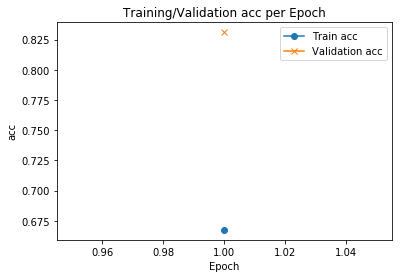

In [20]:
import matplotlib.pyplot as plt
f, ax = plt.subplots()
ax.plot([None] + CNN.history['accuracy'], 'o-')
ax.plot([None] + CNN.history['val_accuracy'], 'x-')
ax.legend(['Train acc', 'Validation acc'], loc = 0)
ax.set_title('Training/Validation acc per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('acc')

Text(0, 0.5, 'acc')

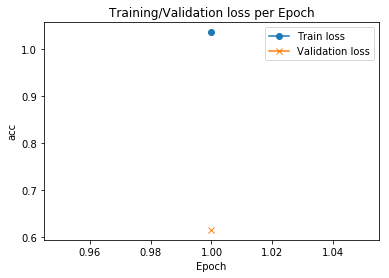

In [21]:
import matplotlib.pyplot as plt
f, ax = plt.subplots()
ax.plot([None] + CNN.history['loss'], 'o-')
ax.plot([None] + CNN.history['val_loss'], 'x-')
ax.legend(['Train loss', 'Validation loss'], loc = 0)
ax.set_title('Training/Validation loss per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('acc')